In [1]:
# dataset = "/Users/alexa/Projects/ChenLab/seizure_library/data/250604_seizure_T1_interpolated.parquet"
# import pyarrow.parquet as pq
# pf = pq.ParquetFile(dataset)
# cols = pf.schema.names
# print(cols)

In [2]:
# import pyarrow as pa

# # Read the Parquet file into a PyArrow Table
# table = pq.read_table(dataset)

# # Rename the column(s)
# # Provide a list of new column names in the order of existing columns
# new_column_names = ['pi_time', 'EEG', 'accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'pitch', 'roll']
# renamed_table = table.rename_columns(new_column_names)

# # Write the modified table back to a new Parquet file
# pq.write_table(renamed_table, dataset)

In [1]:
import spark

In [2]:
project_name = 'test_project'
spark.setup_project('test_project', override=False)
spark.update_config('test_project', original_data_dir="/Users/alexa/Projects/ChenLab/seizure_library/data", window_size=1.0, GMM_components=25*6)
config = spark.load_config(project_name)
spark.load_data(project_name, config)

Directory test_project already exists and override is set to False.
Configuration validated successfully.
File test_project/data/250507_seizure_I2_1_interpolated.parquet already exists. Skipping symlink creation.
File test_project/data/250511_seizure_I7_2_interpolated.parquet already exists. Skipping symlink creation.
File test_project/data/250509_seizure_I7_1_interpolated.parquet already exists. Skipping symlink creation.
File test_project/data/250501_seizure_S2_1_interpolated.parquet already exists. Skipping symlink creation.
File test_project/data/250513_seizure_I2C_1_interpolated.parquet already exists. Skipping symlink creation.
File test_project/data/250604_seizure_T1_interpolated.parquet already exists. Skipping symlink creation.
Data loading complete. Files are available in test_project/data.


In [3]:
spark.create_hdf5_dataset(config)

🔄 Setting up HDF5 data store...
DATA DIR: test_project/data
Using existing HDF5 file: test_project/data_store.h5
Dataset 250507_seizure_I2_1_interpolated already converted, skipping...
Dataset 250511_seizure_I7_2_interpolated already converted, skipping...
Dataset 250509_seizure_I7_1_interpolated already converted, skipping...
Dataset 250501_seizure_S2_1_interpolated already converted, skipping...
Dataset 250513_seizure_I2C_1_interpolated already converted, skipping...
Dataset 250604_seizure_T1_interpolated already converted, skipping...
✅ HDF5 data store setup complete


'test_project/data_store.h5'

In [6]:
spark.extract_features_hdf5(config)

DATA DIR: test_project/data
Using existing HDF5 file: test_project/data_store.h5
Using batch size: 20,000 windows

🔄 Processing dataset: 250501_seizure_S2_1_interpolated
Features for 250501_seizure_S2_1_interpolated already exist, skipping...

🔄 Processing dataset: 250507_seizure_I2_1_interpolated
Features for 250507_seizure_I2_1_interpolated already exist, skipping...

🔄 Processing dataset: 250509_seizure_I7_1_interpolated
Features for 250509_seizure_I7_1_interpolated already exist, skipping...

🔄 Processing dataset: 250511_seizure_I7_2_interpolated
Features for 250511_seizure_I7_2_interpolated already exist, skipping...

🔄 Processing dataset: 250513_seizure_I2C_1_interpolated
Features for 250513_seizure_I2C_1_interpolated already exist, skipping...

🔄 Processing dataset: 250604_seizure_T1_interpolated
Features for 250604_seizure_T1_interpolated already exist, skipping...

✅ Feature extraction complete! Data stored in: test_project/data_store.h5


'test_project/data_store.h5'

In [3]:
# Create the analysis pipeline
h5_path = "/Users/alexa/Projects/ChenLab/seizure_library/test_project/data_store.h5"
pipeline = spark.create_analysis_pipeline_hdf5(h5_path, config)

Creating analysis pipeline with HDF5 data: /Users/alexa/Projects/ChenLab/seizure_library/test_project/data_store.h5
Results will be saved to: /Users/alexa/Projects/ChenLab/seizure_library/test_project/predictions


In [4]:
spark.update_config("test_project", GMM_components = 25)
config = spark.load_config("test_project")

Configuration validated successfully.


In [9]:
# Fit GMM on sampled data
gmm, gmm_path = pipeline['fit_gmm'](config)


🔄 Fitting GMM on sampled data...
Performing feature normalization:
Sampling 200,000 windows from 543,990 total
  Sampling 31,084 from 250501_seizure_S2_1_interpolated (84,548 total)
  Sampling 38,418 from 250507_seizure_I2_1_interpolated (104,496 total)
  Sampling 40,440 from 250509_seizure_I7_1_interpolated (109,996 total)
  Sampling 36,128 from 250511_seizure_I7_2_interpolated (98,267 total)
  Sampling 17,733 from 250513_seizure_I2C_1_interpolated (48,235 total)
  Sampling 36,194 from 250604_seizure_T1_interpolated (98,448 total)
Generating all normalized samples
Training GMM on 199,997 samples with 25 components
Fitting GMM on features with shape: (199997, 28)
Initialization 0


/Users/alexa/miniconda/envs/chenlab/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/alexa/miniconda/envs/chenlab/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/alexa/miniconda/envs/chenlab/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/alexa/miniconda/envs/chenlab/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/alexa/miniconda/envs/chenlab/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/alexa/miniconda/envs/chenlab/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value enco

  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged.
✅ GMM saved to: /Users/alexa/Projects/ChenLab/seizure_library/test_project/predictions/gmm.joblib


In [6]:
gmm_path = '/Users/alexa/Projects/ChenLab/seizure_library/test_project/predictions/gmm.joblib'

In [11]:
predictions, probabilities, pred_path = pipeline['predict_gmm'](gmm_path)

🔄 Predicting features using: /Users/alexa/Projects/ChenLab/seizure_library/test_project/predictions/gmm.joblib


Predicting datasets:   0%|          | 0/6 [00:00<?, ?it/s]

Processing 250501_seizure_S2_1_interpolated...
  Predicted 84548 windows
Processing 250507_seizure_I2_1_interpolated...
  Predicted 104496 windows
Processing 250509_seizure_I7_1_interpolated...
  Predicted 109996 windows
Processing 250511_seizure_I7_2_interpolated...
  Predicted 98267 windows
Processing 250513_seizure_I2C_1_interpolated...
  Predicted 48235 windows
Processing 250604_seizure_T1_interpolated...
  Predicted 98448 windows
✅ Predictions saved to: /Users/alexa/Projects/ChenLab/seizure_library/test_project/predictions/gmm_predictions.npz


In [13]:
pipeline['label'](config=config)

In [5]:
pipeline['create_merged_dataset'](config=config)

✅ Merged events saved to: test_project/results/merged_windows.csv


PosixPath('test_project/results/merged_windows.csv')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path

df = pd.read_csv("/Users/alexa/Projects/ChenLab/seizure_library/test_project/results/merged_windows.csv")
df

,dataset,start_time,end_time,start_idx,end_idx,label,duration
0,250501_seizure_S2_1_interpolated,0.00,1.80,0,900,normal,1.8
1,250501_seizure_S2_1_interpolated,1.60,2.60,800,1300,artifact,1.0
2,250501_seizure_S2_1_interpolated,2.40,3.40,1200,1700,normal,1.0
3,250501_seizure_S2_1_interpolated,3.20,7.40,1600,3700,interictal,4.2
4,250501_seizure_S2_1_interpolated,7.20,113.80,3600,56900,normal,106.6
...,...,...,...,...,...,...,...
49070,250604_seizure_T1_interpolated,78703.76,78726.36,39351900,39363200,normal,22.6
49071,250604_seizure_T1_interpolated,78726.16,78727.16,39363100,39363600,interictal,1.0
49072,250604_seizure_T1_interpolated,78726.96,78743.96,39363500,39372000,normal,17.0
49073,250604_seizure_T1_interpolated,78743.76,78744.76,39371900,39372400,interictal,1.0


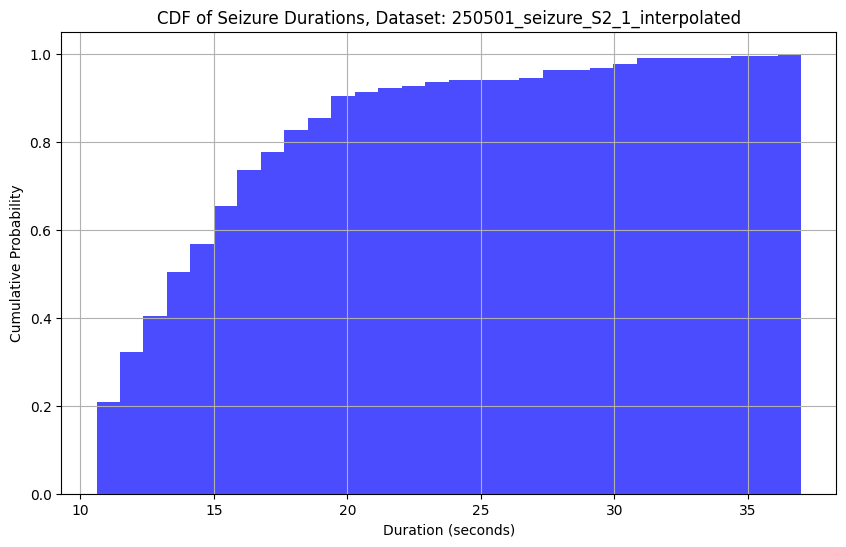

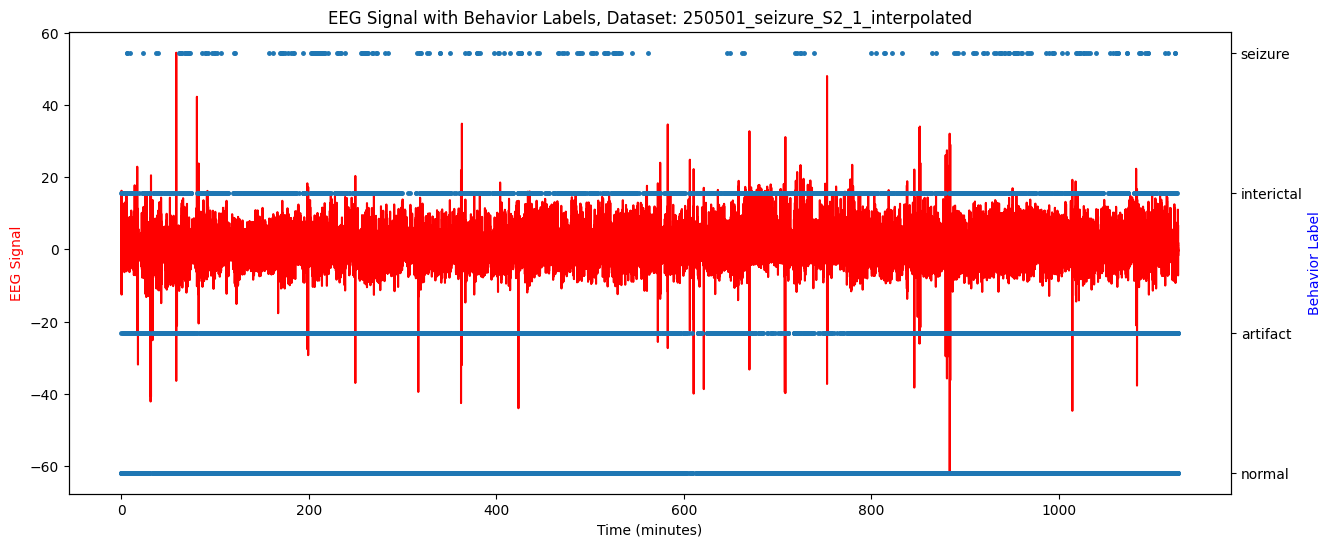

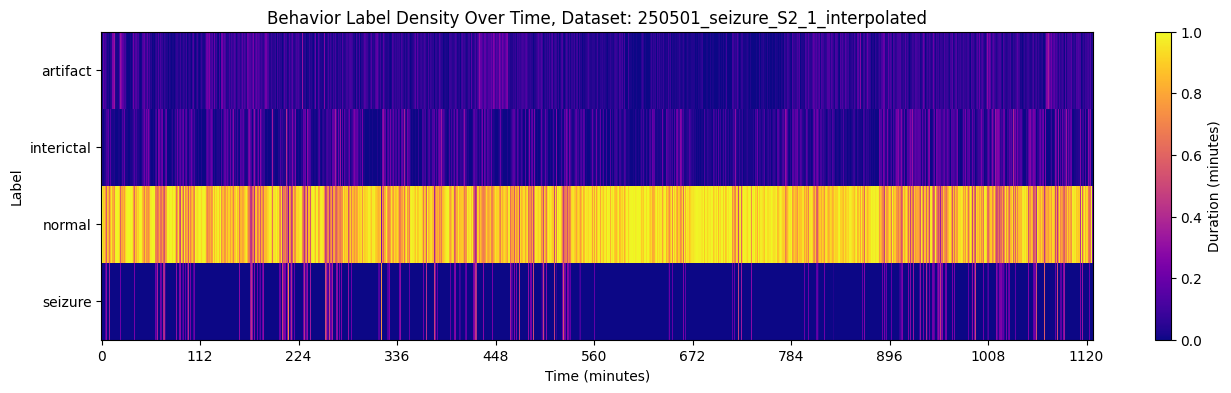

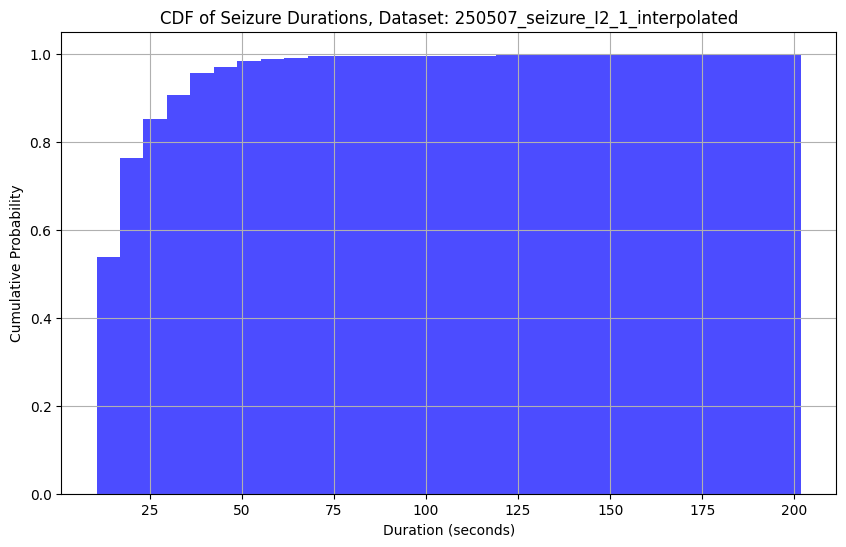

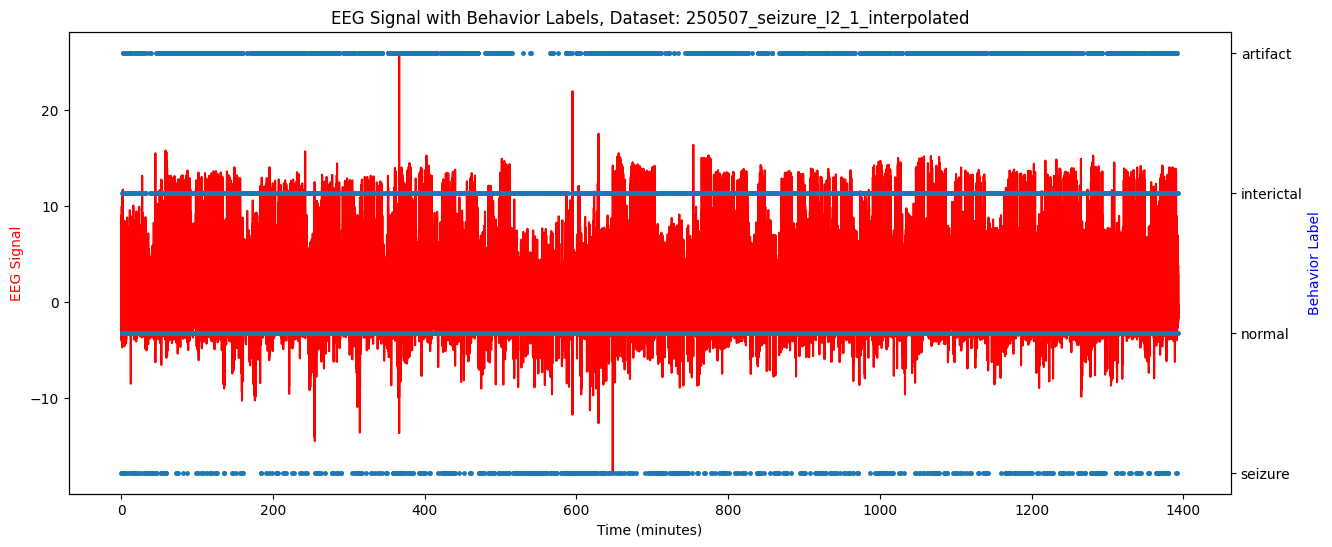

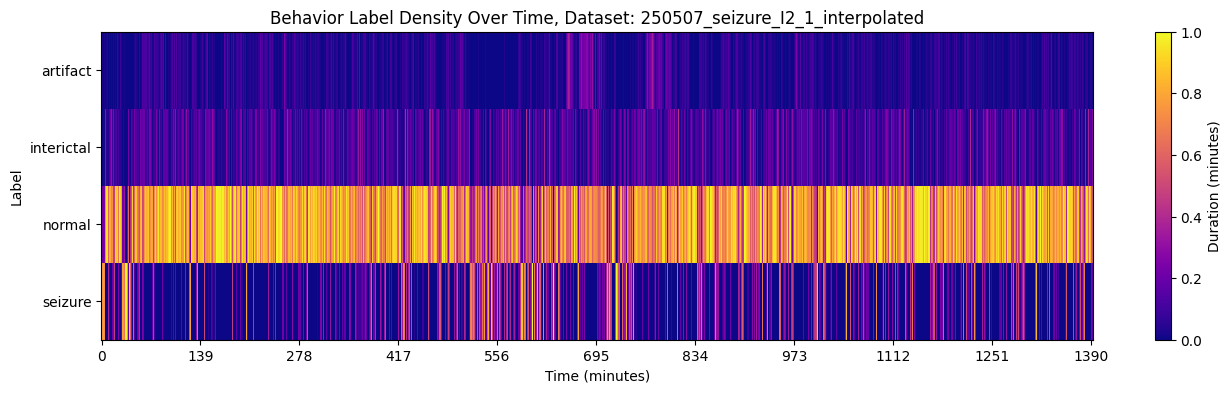

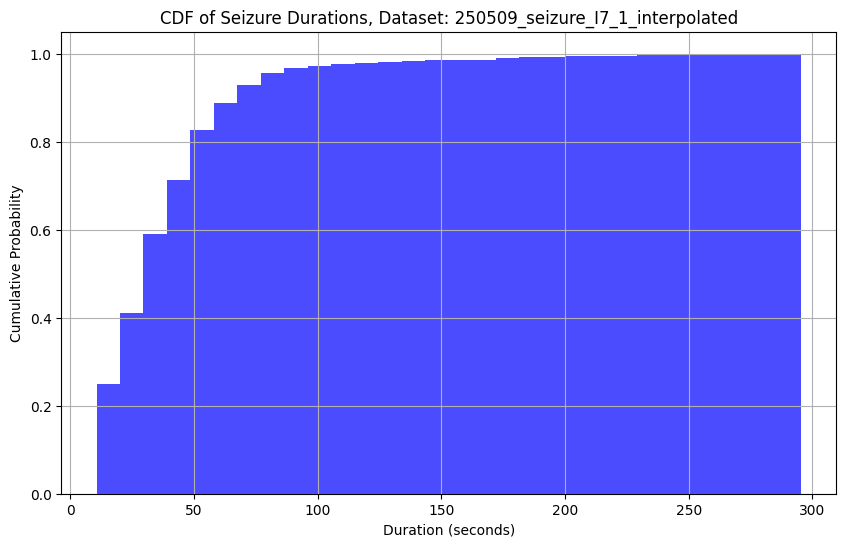

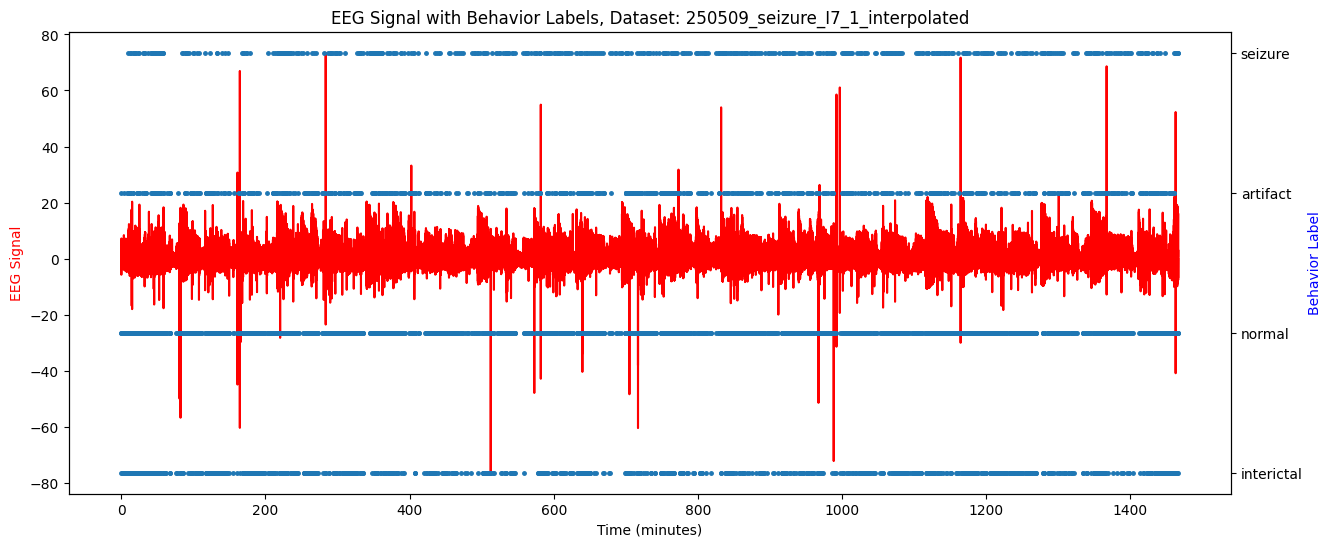

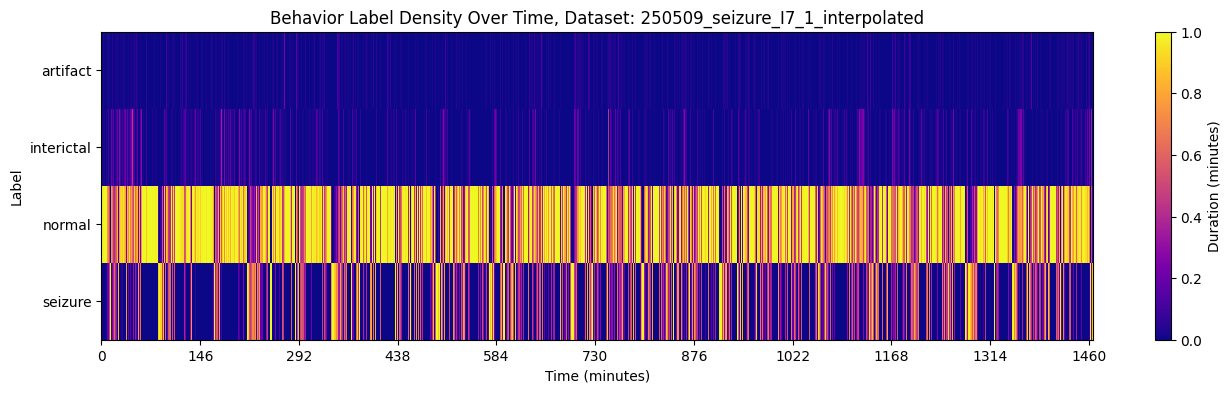

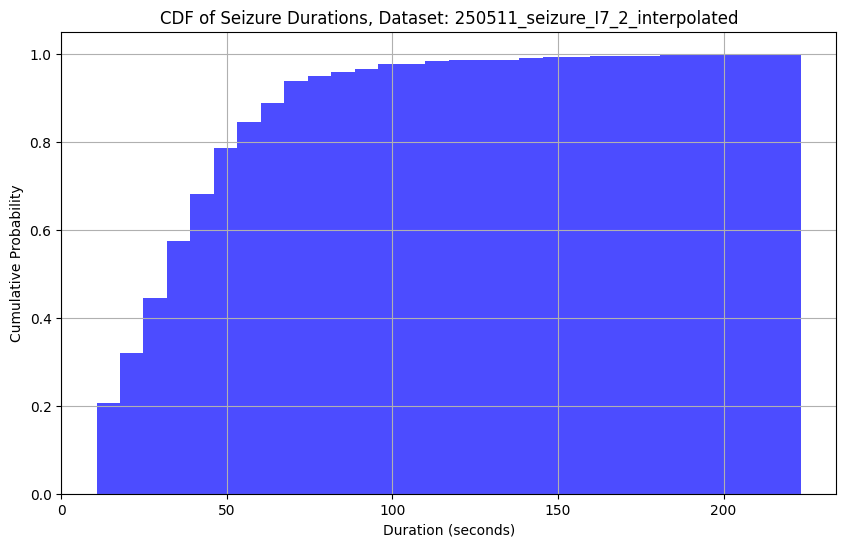

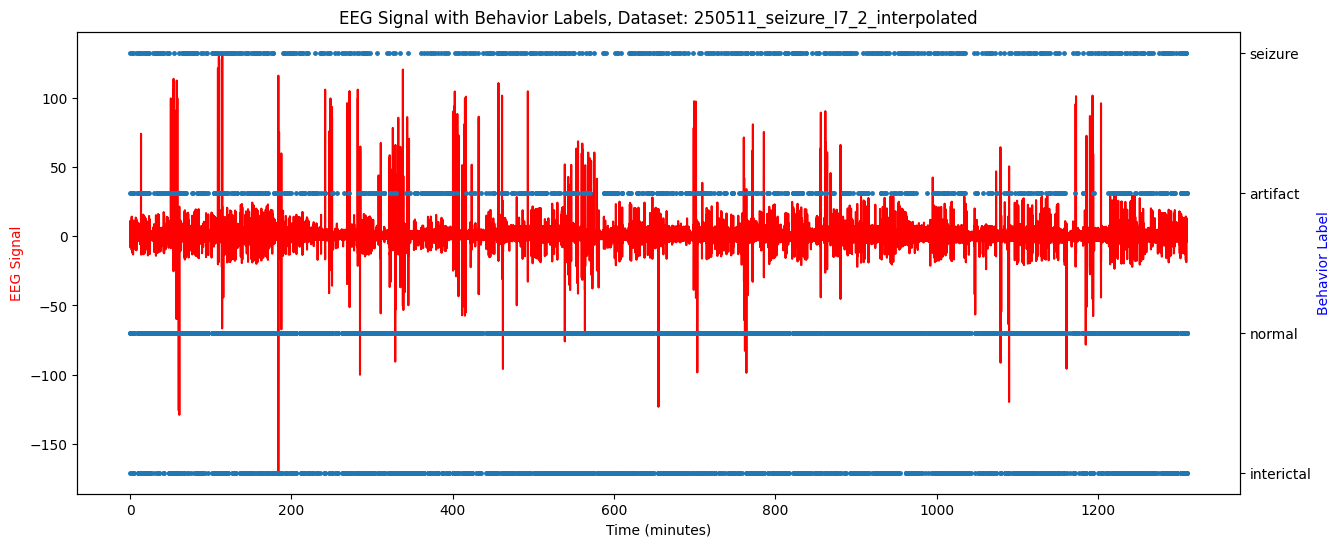

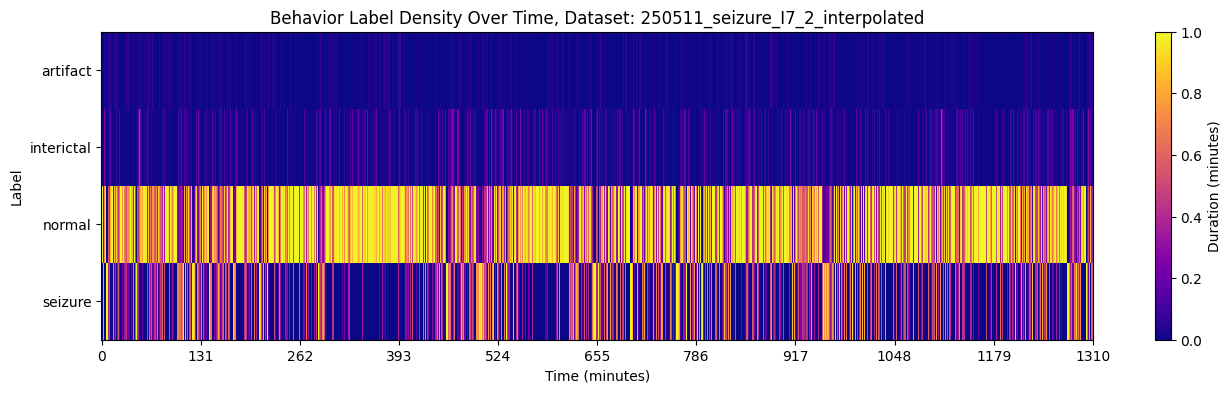

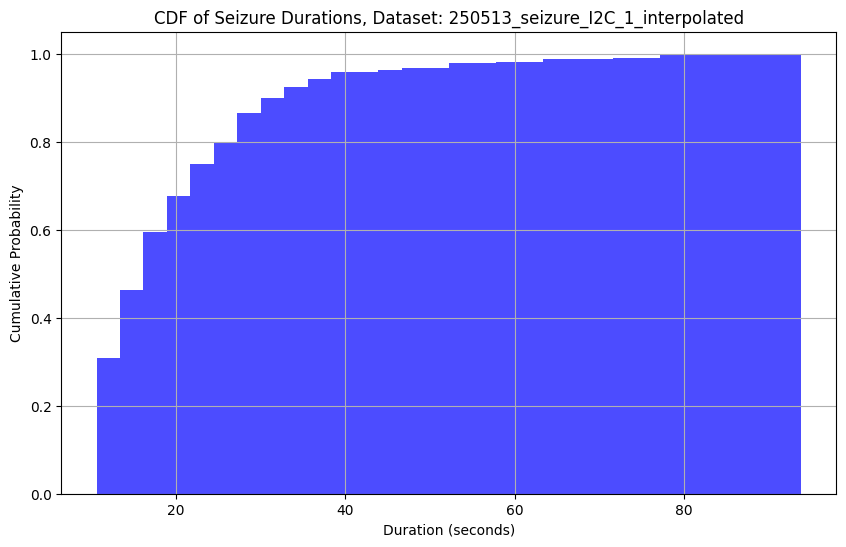

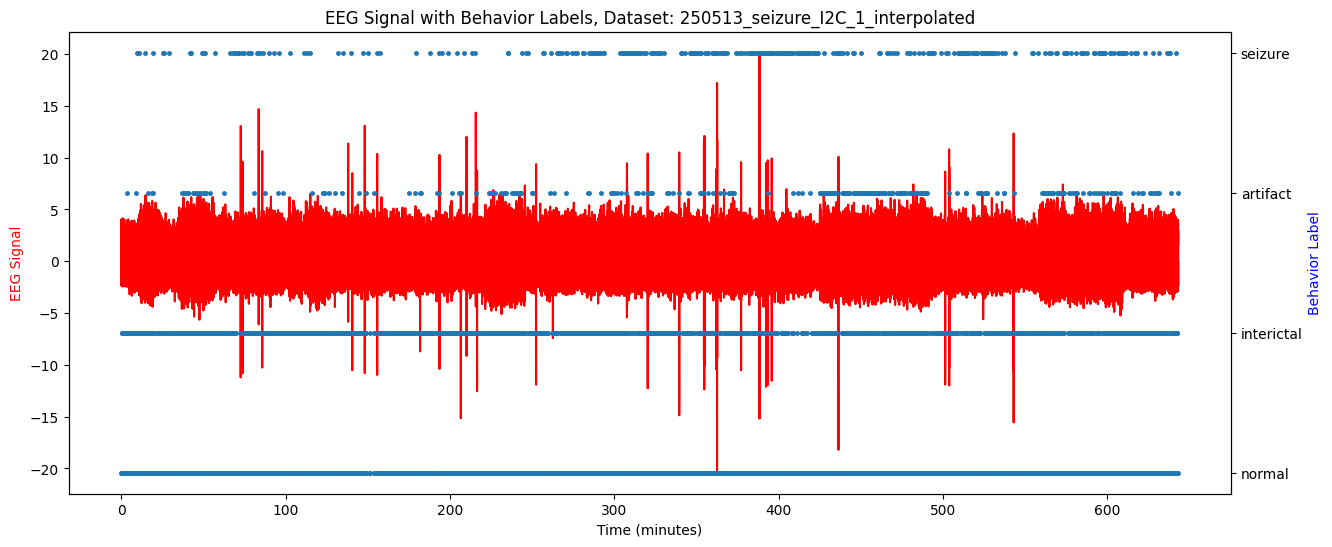

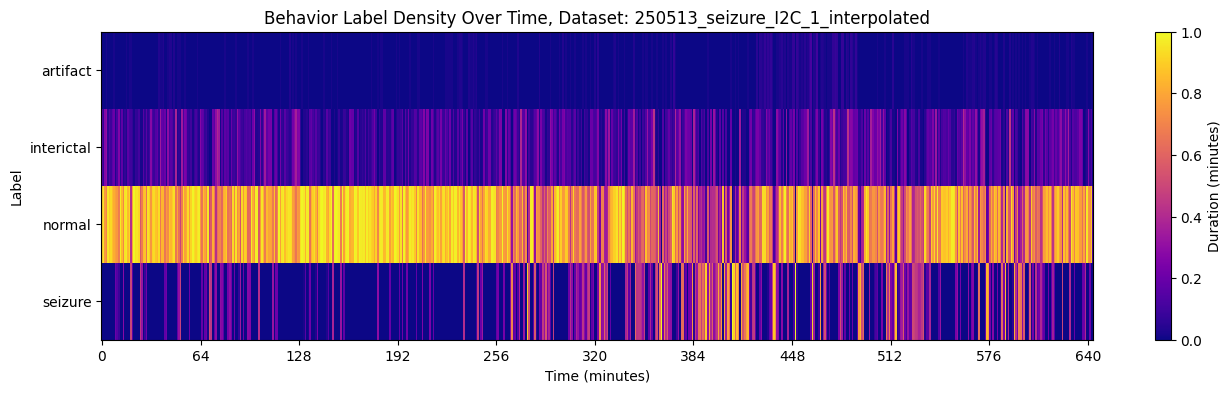

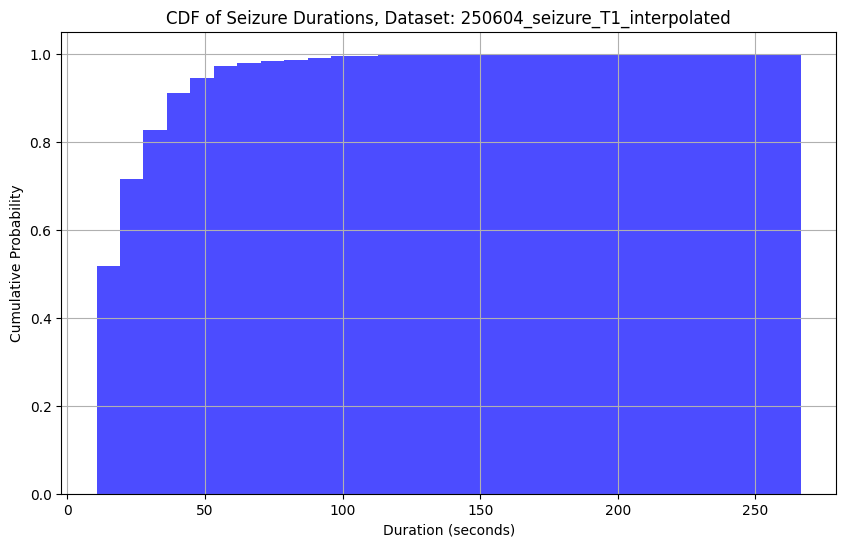

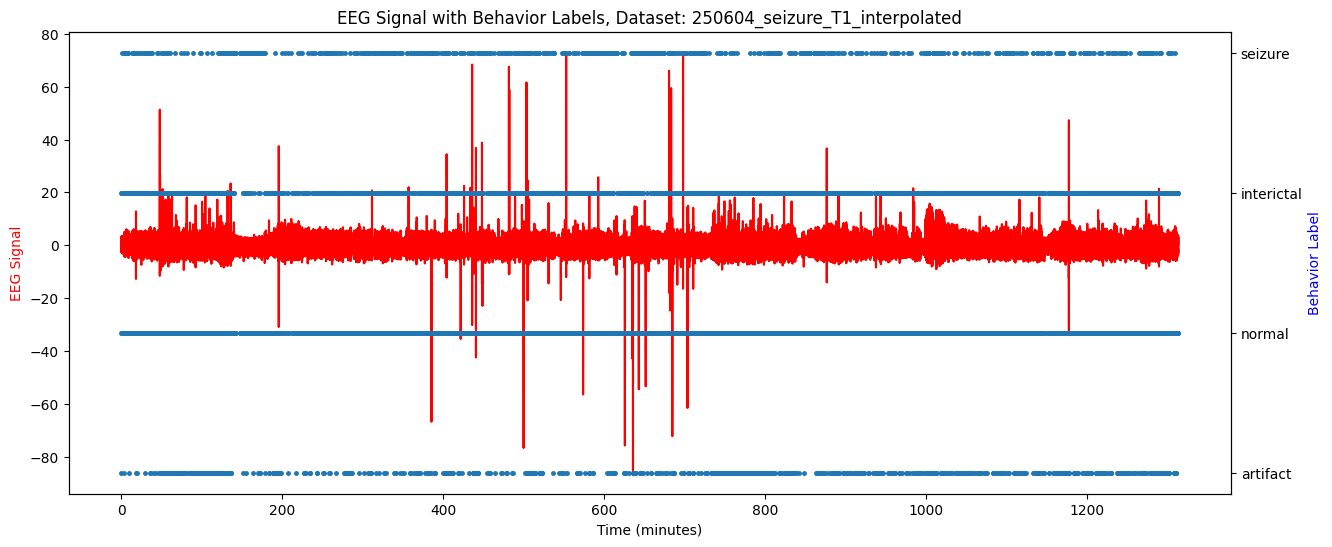

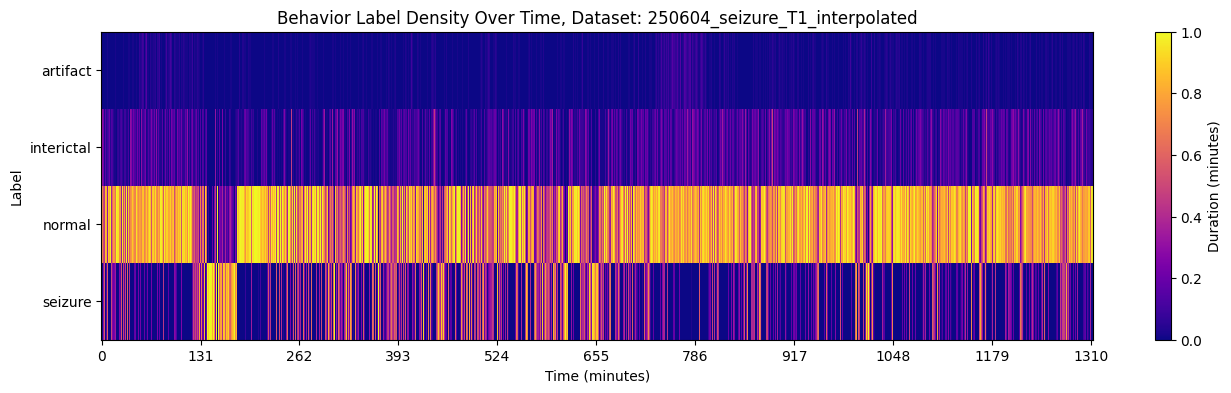

In [12]:
import numpy as np


def create_visualizations(config, pdf_name="dataset_vis.pdf"):
	windows_path = config.get("project_name", None) + "/results/merged_windows.csv"
	windows_df = pd.read_csv(windows_path)
	output_dir = Path(config['project_name']) / 'results'
	pdf_path = output_dir / pdf_name
	with PdfPages(pdf_path) as pdf:
		with h5py.File(h5_path, 'r') as h5f:
			for dataset in windows_df['dataset'].unique():
				# # Create a CDF of seizure durations
				df = windows_df[windows_df['dataset'] == dataset]
				seizures = df[df["label"] == 'seizure'].sort_values(by='duration')
				fig = plt.figure(figsize=(10, 6))
				plt.hist(seizures['duration'], bins=30, density=True, cumulative=True, color='blue', alpha=0.7)
				plt.title('CDF of Seizure Durations, Dataset: ' + dataset)
				plt.xlabel('Duration (seconds)')
				plt.ylabel('Cumulative Probability')
				plt.grid(True)
				pdf.savefig(fig)
				plt.show()

				# For each dataset, also plot the original signal, along with when the labels occur
				eeg_signal = h5f['processed_data'][dataset][:]

				start_indices = df['start_idx'].tolist()
				time_int_select = h5f['time_data'][dataset][:]
				start_time = time_int_select[start_indices]
				labels = df['label']
				plt.ion()
				fig = plt.figure(figsize=(15,6))
				ax1 = fig.add_subplot(111)
				ax2 = ax1.twinx()
				ax1.plot((time_int_select - time_int_select[0])/1000/60, eeg_signal, 'r')
				ax2.plot((start_time - time_int_select[0])/1000/60, labels, '.', markersize=5)
				
				# title
				ax1.set_title('EEG Signal with Behavior Labels, Dataset: ' + dataset)
				ax1.set_xlabel('Time (minutes)')
				ax1.set_ylabel('EEG Signal', color='r')
				ax2.set_ylabel('Behavior Label', color='b')
				pdf.savefig(fig)
				plt.show()
				plt.close(fig)
				

				# For each minute of data in the dataset, plot a behavior density label over time.
				# Plot behavior label density over time (heatmap)

				# Define time bins (e.g., 1 minute bins)
				total_minutes = int(np.ceil((df[df['dataset'] == dataset]['end_time'].max() - df[df['dataset'] == dataset]['start_time'].min()) / 60))
				time_bins = np.arange(0, total_minutes + 1) * 60  # in seconds

				# Get unique labels and map to y-axis
				labels = df['label'].unique()
				labels.sort()
				label_to_idx = {label: idx for idx, label in enumerate(labels)}

				# Create a 2D array: rows=labels, cols=time bins
				density = np.zeros((len(labels), len(time_bins) - 1))

				df_dataset = df[df['dataset'] == dataset]
				for _, row in df_dataset.iterrows():
					label_idx = label_to_idx[row['label']]
					# Find which bins this window covers
					start = row['start_time']
					end = row['end_time']
					# Find overlapping bins
					bin_indices = np.where((time_bins[:-1] < end) & (time_bins[1:] > start))[0]
					for b in bin_indices:
						# Compute overlap duration in this bin
						bin_start = time_bins[b]
						bin_end = time_bins[b+1]
						overlap = max(0, min(end, bin_end) - max(start, bin_start))
						density[label_idx, b] += overlap / 60.0  # convert to minutes

				fig, ax = plt.subplots(figsize=(16, 4))
				im = ax.imshow(density, aspect='auto', cmap='plasma', interpolation='nearest')
				ax.set_yticks(np.arange(len(labels)))
				ax.set_yticklabels(labels)
				ax.set_xlabel('Time (minutes)')
				ax.set_ylabel('Label')
				ax.set_title('Behavior Label Density Over Time, Dataset: ' + dataset)
				ax.set_xticks(np.arange(0, len(time_bins)-1, max(1, (len(time_bins)-1)//10)))
				ax.set_xticklabels(np.arange(0, total_minutes+1, max(1, (total_minutes)//10)))
				cbar = fig.colorbar(im, ax=ax)
				cbar.set_label('Duration (minutes)')
				pdf.savefig(fig)
				plt.show()
				plt.close(fig)


create_visualizations(config)


In [ ]:
predictions

{'250501_seizure_S2_1_interpolated': array([13,  8, 10, ...,  3,  9,  9], shape=(84548,)),
 '250507_seizure_I2_1_interpolated': array([22, 19, 23, ..., 12, 12, 19], shape=(104496,)),
 '250509_seizure_I7_1_interpolated': array([ 6,  2, 21, ...,  6, 17, 11], shape=(109996,)),
 '250511_seizure_I7_2_interpolated': array([ 6, 19,  2, ..., 10, 11, 11], shape=(98267,)),
 '250513_seizure_I2C_1_interpolated': array([15, 23,  3, ...,  9, 23, 18], shape=(48235,)),
 '250604_seizure_T1_interpolated': array([10,  2,  2, ...,  9,  8,  8], shape=(98448,))}

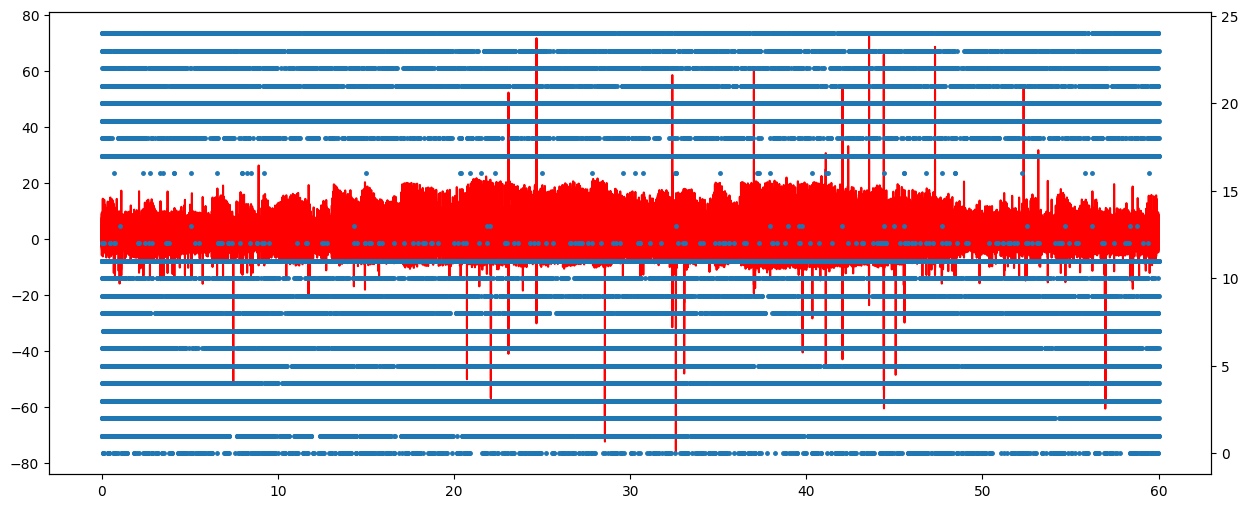

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 1000
spark.plot_eeg_with_clusters_from_h5("/Users/alexa/Projects/ChenLab/seizure_library/test_project/data_store.h5", "250509_seizure_I7_1_interpolated", predictions)

In [ ]:
pipeline['create_labeled_pdf'](config=config)

KeyError: 'label'

In [ ]:
import numpy as np
data = np.load("/Users/alexa/Projects/ChenLab/seizure_library/test_project/predictions/gmm_predictions.npz")
predictions = data['250501_seizure_S2_1_interpolated_predictions']
predictions

array([13,  8, 10, ...,  3,  9,  9], shape=(84548,))

In [ ]:
import h5py
import numpy as np
import pandas as pd
# I want to join meta_data with predictions
all_windows = []
with h5py.File("/Users/alexa/Projects/ChenLab/seizure_library/test_project/data_store.h5", 'a') as h5f:
    for dataset in h5f['processed_data']:
        meta_data = h5f['metadata'][dataset + '_window_info'][:]
        eeg_data = h5f['processed_data'][dataset][:]
        start_indices = [int(i[3]) for i in meta_data]
        time_int_select = h5f['time_data'][dataset][:]
        start_time = time_int_select[start_indices]
        predictions = data[dataset + '_predictions']
        df_clusters = pd.DataFrame(predictions, columns=['cluster'])
        df_meta = pd.DataFrame(meta_data)
        df_meta['dataset'] = dataset
        df_meta['start_time'] = start_time
        df_meta['cluster'] = df_clusters['cluster']

        all_windows.append(df_meta)

df_meta = pd.concat(all_windows, ignore_index=True)

In [ ]:
time_int_select

NameError: name 'time_int_select' is not defined

In [ ]:
len(meta_data)

98448

In [ ]:
type(meta_data)

numpy.ndarray

In [ ]:
df_meta

,window_id,start_time,end_time,start_idx,end_idx,dataset,cluster
0,0,0.0,1.000000,0,500,250501_seizure_S2_1_interpolated,98
1,1,800.0,1.800000,400,900,250501_seizure_S2_1_interpolated,89
2,2,1600.0,2.600000,800,1300,250501_seizure_S2_1_interpolated,129
3,3,2400.0,3.400000,1200,1700,250501_seizure_S2_1_interpolated,62
4,4,3200.0,4.200000,1600,2100,250501_seizure_S2_1_interpolated,129
...,...,...,...,...,...,...,...
543985,98445,3154958.0,78756.000000,39377500,39378000,250604_seizure_T1_interpolated,11
543986,98446,3155758.0,78756.796875,39377900,39378400,250604_seizure_T1_interpolated,83
543987,98447,3156558.0,78757.601562,39378300,39378800,250604_seizure_T1_interpolated,46
543988,98448,3157358.0,78758.398438,39378700,39379200,250604_seizure_T1_interpolated,8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

def show_figure(df_cluster, cluster,
                h5_path="test_project/data_store.h5",
                forward_back_time_s=2.0, n_samples=20, channel=None, highlight_color="tab:blue"):
    # Sample then sort to improve HDF5 cache locality
    sample_df = df_cluster.sample(n=min(n_samples, len(df_cluster)), random_state=42).copy()
    sample_df = sample_df.sort_values(['dataset', 'start_idx']).reset_index(drop=True)

    fig, axes = plt.subplots(5, 4, figsize=(20, 16))
    axes = axes.flatten()

    with h5py.File(h5_path, 'r') as h5f:
        ds_cache = {}

        for i, ax in enumerate(axes):
            if i >= len(sample_df):
                ax.set_facecolor('black'); ax.axis('off'); continue

            row = sample_df.iloc[i]
            ds_name = row['dataset']

            # Lazy-open dataset handles; infer fs cheaply
            if ds_name not in ds_cache:
                eeg_ds = h5f['processed_data'][ds_name]
                t_ds   = h5f['time_data'][ds_name]  # milliseconds
                fs = eeg_ds.attrs.get('sampling_rate', None)
                if fs is None:
                    t2 = t_ds[0:2]
                    fs = 1000.0 / (t2[1] - t2[0]) if len(t2) == 2 and (t2[1] - t2[0]) > 0 else 500.0
                ds_cache[ds_name] = (eeg_ds, t_ds, float(fs))

            eeg_ds, t_ds, fs = ds_cache[ds_name]
            n_samples_ds = eeg_ds.shape[0]

            # Event (chunk) indices from your dataframe
            ev_start = int(row['start_idx'])
            ev_end   = int(row['end_idx'])     # assumed exclusive

            # Context window in samples
            pad = int(round(forward_back_time_s * fs))
            win_start = max(ev_start - pad, 0)
            win_end   = min(ev_end + pad, n_samples_ds)

            if win_end <= win_start:
                ax.set_facecolor('lightgray')
                ax.text(0.5, 0.5, 'Invalid range', ha='center', va='center', fontsize=10)
                ax.axis('off')
                continue

            # Read ONLY the needed slices
            t_win_ms = t_ds[win_start:win_end]       # (W,)
            y = eeg_ds[win_start:win_end]            # (W,) or (W,C)

            # If multichannel, pick/aggregate
            if y.ndim == 2:
                y = y.mean(axis=1) if channel is None else y[:, int(channel)]

            # Anchor time to the event start so the event spans [0, duration]
            t0_ms = t_ds[ev_start]
            # Handle ev_end possibly being "exclusive" at array end
            if ev_end < n_samples_ds:
                t1_ms = t_ds[ev_end]
            else:
                t1_ms = t_ds[ev_end - 1] + (1000.0 / fs)

            x = (t_win_ms - t0_ms) / 1000.0  # seconds, negative before event, positive after

            # Plot signal
            ax.plot(x, y, linewidth=0.8)

            # Blue highlight exactly over the sampled chunk
            chunk_duration_s = (t1_ms - t0_ms) / 1000.0
            ax.axvspan(0.0, chunk_duration_s, facecolor=highlight_color, alpha=0.3)

            # Ensure requested context is visible on both sides (may be truncated at edges)
            ax.set_xlim(-forward_back_time_s, chunk_duration_s + forward_back_time_s)

            # Robust y-limits
            lo, hi = np.percentile(y, [1, 99])
            margin = max((hi - lo) * 0.1, 1e-6)
            ax.set_ylim(lo - margin, hi + margin)

            ax.set_title(f"Sample {i+1}")
            ax.axis('off')

    fig.suptitle(f"Cluster {cluster} - Random Samples", fontsize=20)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig


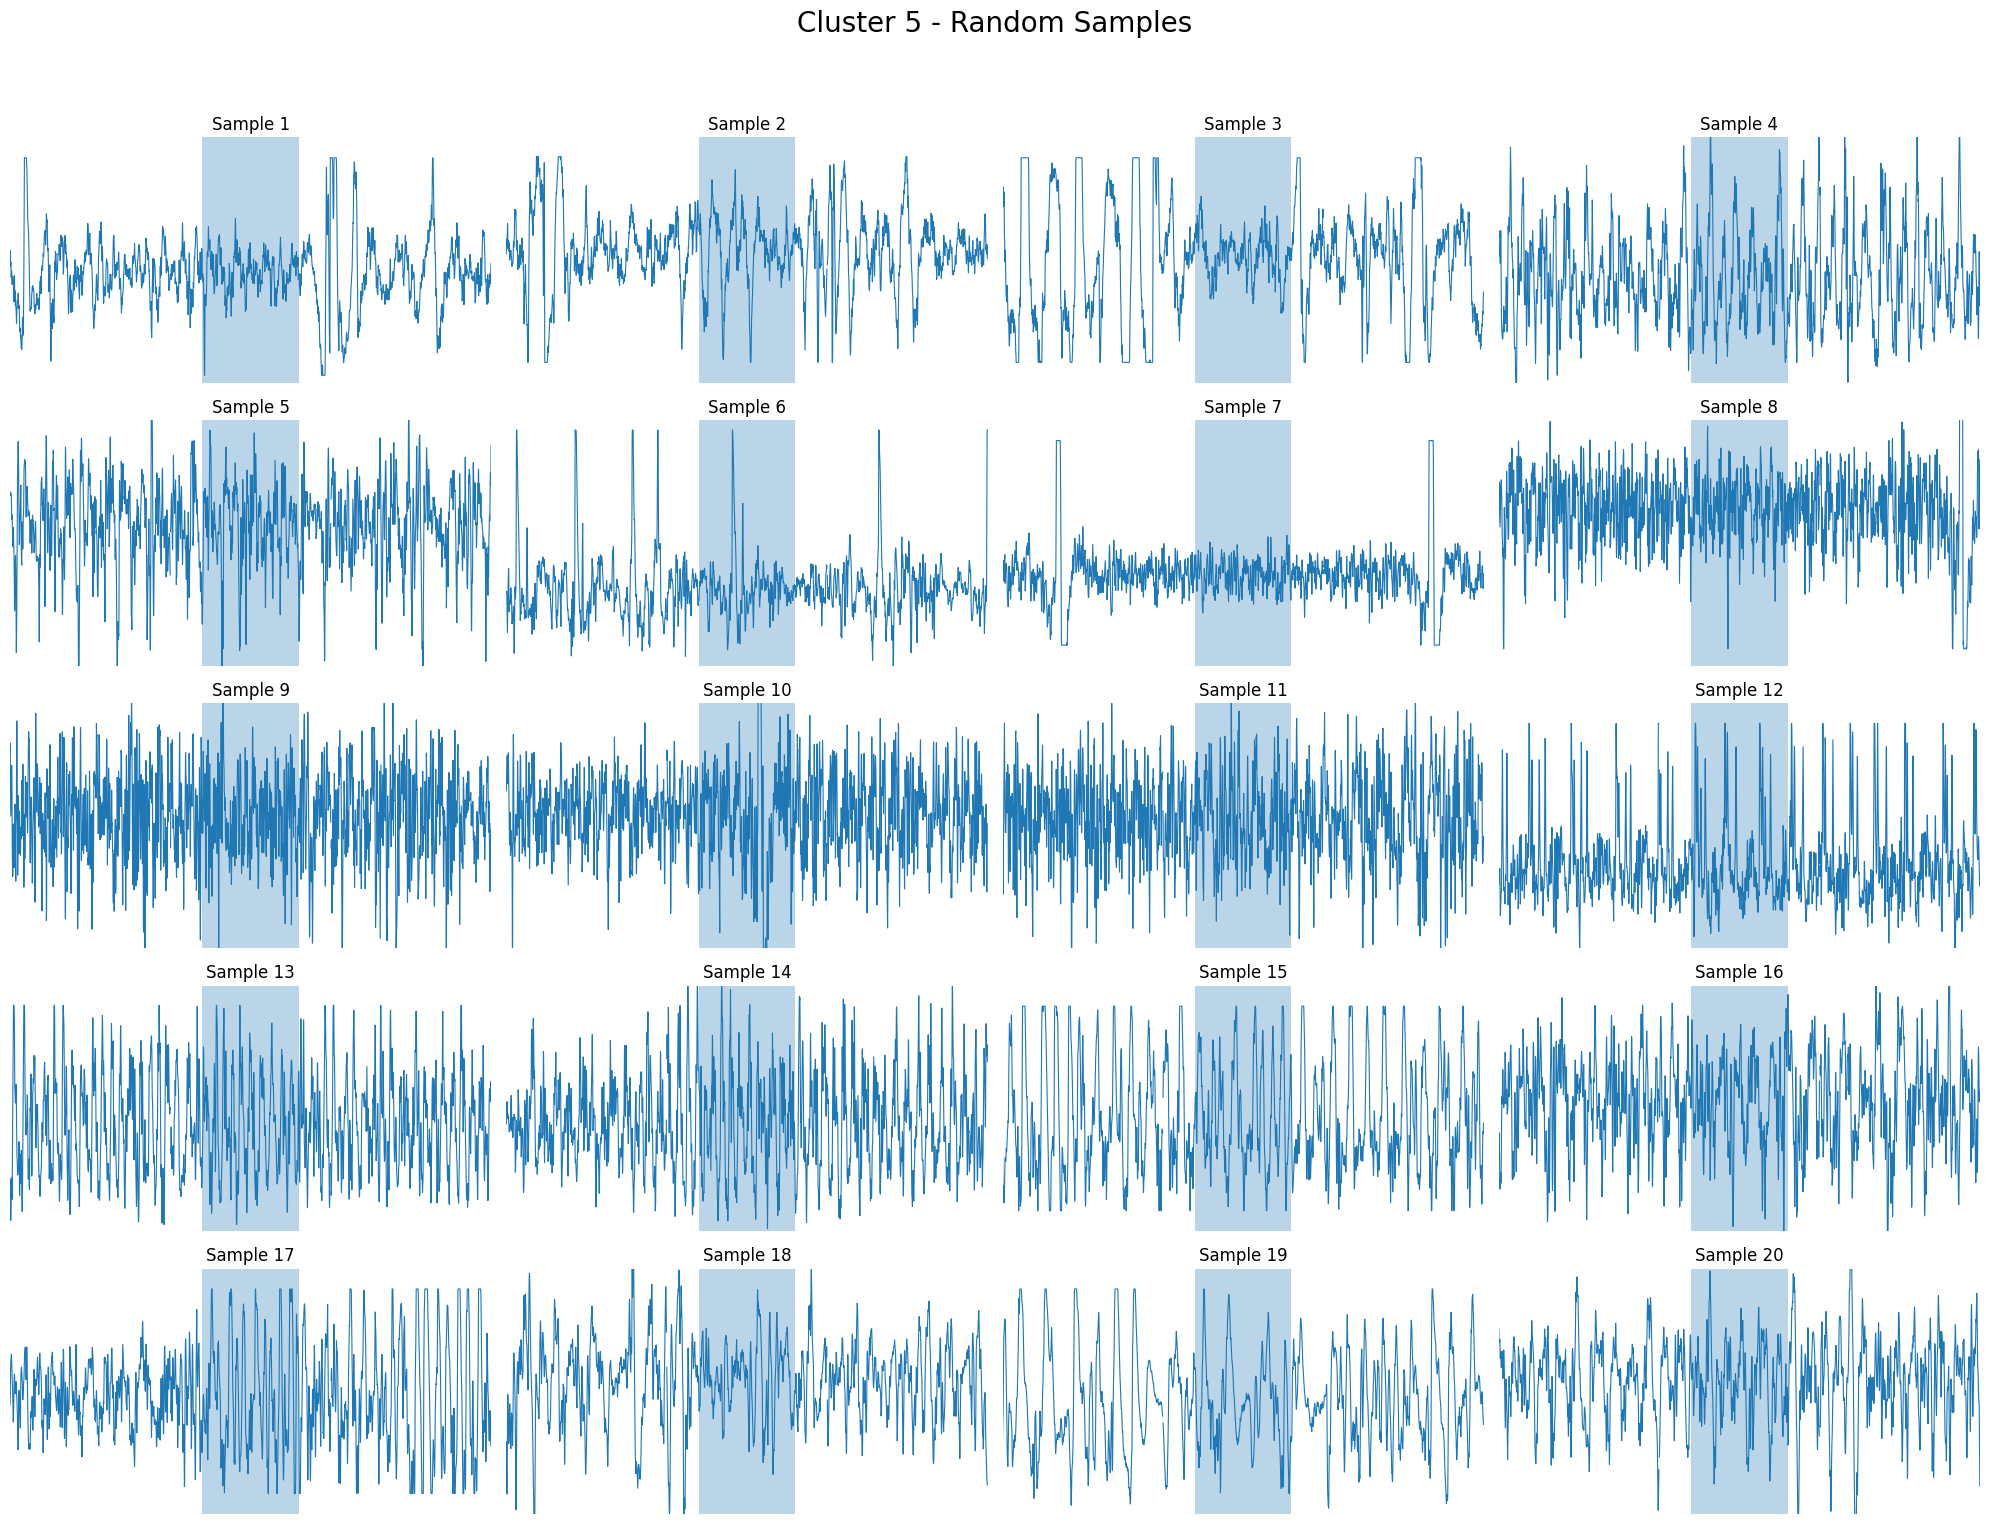

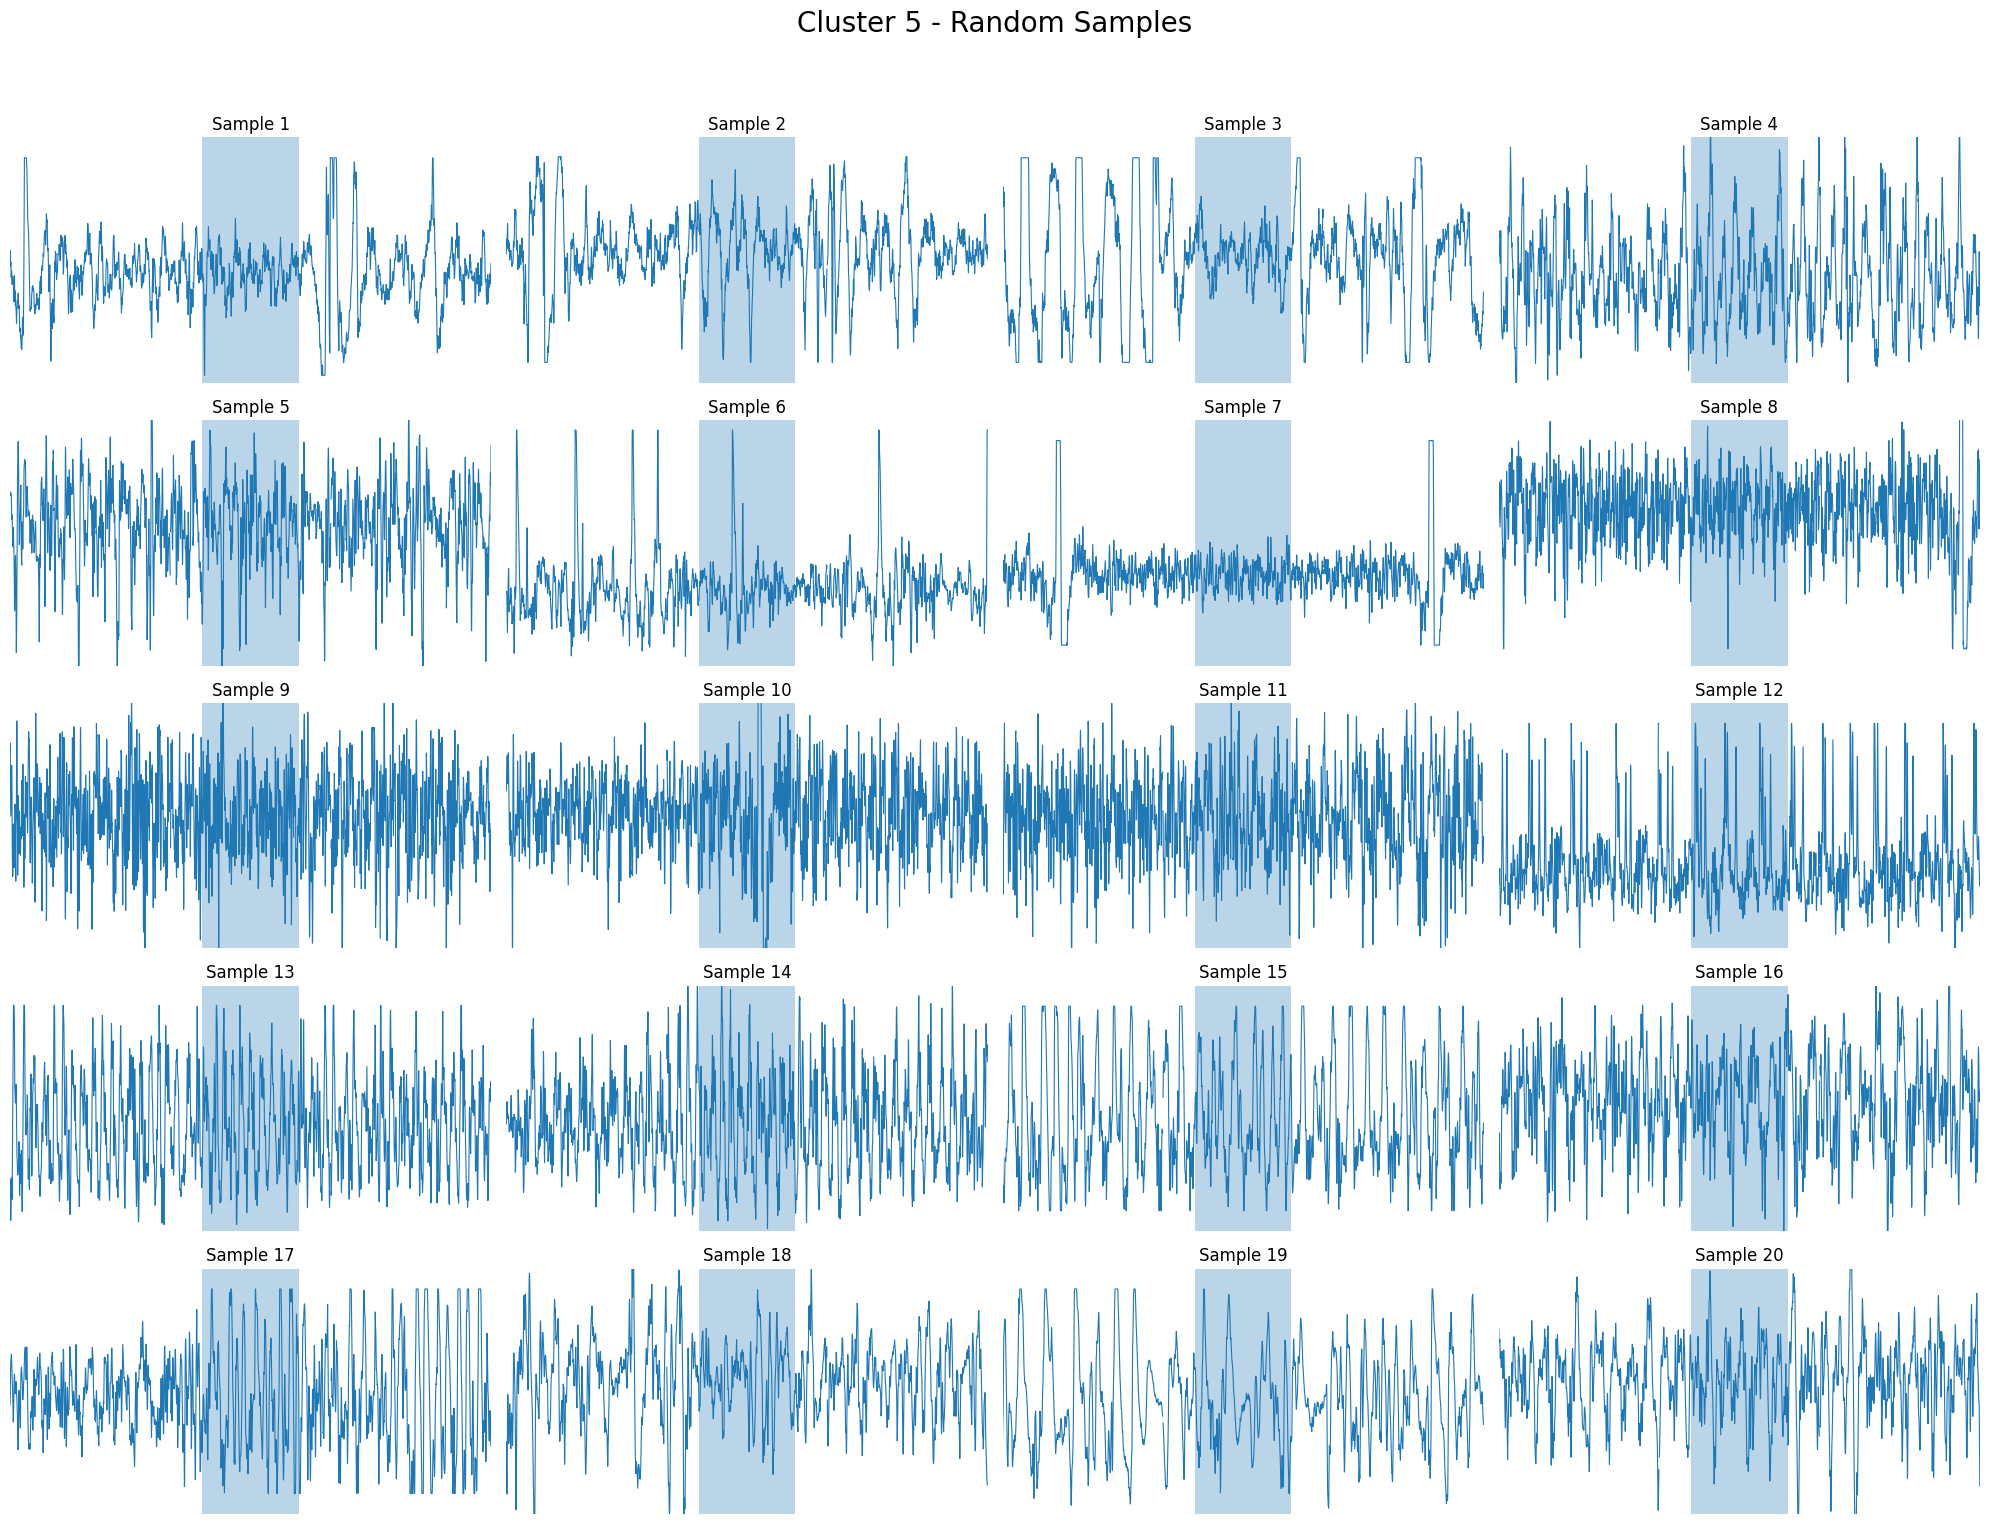

: 

In [ ]:
show_figure(df_meta, 5)

In [ ]:
# I want to randomly sample 20 windows from each cluster and plot them with 1 window before and after. highlight the window in red
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
mpl.rcParams['agg.path.chunksize'] = 1000

for cluster in df_meta['cluster'].unique():
	df_cluster = df_meta[df_meta['cluster'] == cluster]
	sampled_windows = df_cluster.sample(n=20, random_state=42)
	for idx, row in sampled_windows.iterrows():
		window_id = row['window_id']
		start_index = row['start_idx']
		end_index = row['end_idx']
		start_time = row['start_time']
		end_time = row['end_time']
		dataset = row['dataset']
		with h5py.File("/Users/alexa/Projects/ChenLab/seizure_library/test_project/data_store.h5", 'a') as h5f:
			eeg_data = h5f['processed_data'][dataset][:]
			time_data = h5f['time_data'][dataset][:]

			
			# Get one window before and after
			prev_start = max(0, start_index - (end_index - start_index))
			prev_end = start_index
			next_start = end_index
			next_end = min(len(time_data), end_index + (end_index - start_index))
			plt.figure(figsize=(15, 5))
			plt.plot(time_data, eeg_data, label='EEG Signal')
			plt.axvspan(time_data[start_index], time_data[end_index], color='red', alpha=0.5, label='Sampled Window')
			plt.title(f'Dataset: {dataset}, Cluster: {cluster}')
			plt.xlabel('Time (s)')
			plt.ylabel('Amplitude')
			plt.legend()
			plt.xlim(time_data[prev_start], time_data[next_end - 1])
			plt.show()

In [27]:
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
import numpy as np

feature_funcs = [
    ("Amplitude Mean", lambda x: np.mean(np.abs(x))),
    ("Variance", np.var),
    ("Skewness", skew),
    ("Kurtosis", kurtosis),
    ("ZCR", lambda x: np.count_nonzero(np.diff(np.sign(x)))),
    ("PkPk", np.ptp),
    ("NumPeaks", lambda x: find_peaks(x)[0].size)
]

bands = ["theta", "alpha", "beta", "gamma"]

feature_names = [f"{feat}_{band}" 
                for band in bands
                for feat, _ in feature_funcs]

len(feature_names)

28

In [34]:
import h5py
import pandas as pd

with h5py.File("/Users/alexa/Projects/ChenLab/seizure_library/test_project/data_store.h5", 'r') as h5f:
	for dataset in h5f['features']:
		ds = h5f['features'][dataset]
		df = pd.DataFrame(ds[()], columns=feature_names)
		summary = df.describe().T
		feat = summary['std'].idxmax()
		val  = (summary.at[feat, 'std']) ** 2
		print("Dataset:", dataset, "Max Variance Feature:", feat, "Value:", val)
		summary.to_csv(f"{dataset}_statistics.csv")

Dataset: 250501_seizure_S2_1_interpolated Max Variance Feature: NumPeaks_alpha Value: 2249158700687616.0
Dataset: 250507_seizure_I2_1_interpolated Max Variance Feature: Kurtosis_gamma Value: 4.118909958444931
Dataset: 250509_seizure_I7_1_interpolated Max Variance Feature: Variance_theta Value: 18.345673788667227
Dataset: 250511_seizure_I7_2_interpolated Max Variance Feature: Variance_theta Value: 10.049107570384933
Dataset: 250513_seizure_I2C_1_interpolated Max Variance Feature: NumPeaks_alpha Value: 3521714608769296.0
Dataset: 250604_seizure_T1_interpolated Max Variance Feature: Variance_alpha Value: 5.48440902372073
